In [7]:
import pandas as pd
from plotnine import *
from plotnine.options import set_option, figure_size
set_option('base_family',  'Arial')

'Arial'

In [8]:
t5 = pd.read_csv('table_5.csv', sep='&')
t5

Method     MAP  Prec@100  Recall@100  nDCG@100     LR%
0       BM25-BOW  0.0208    0.0100      0.2045    0.0707  0.4606
1        QLM-BOW  0.1279    0.0212      0.3090    0.2104  0.3317
2        SDR-BOW  0.0921    0.0218      0.3055    0.1829  0.3514
3        AES-BOW  0.0474    0.0218      0.3167    0.1436  0.3412
4      AES-BOW-P  0.0602    0.0206      0.3111    0.1530  0.3329
5    SDR-BOW-AES  0.0898    0.0226      0.3199    0.1858  0.3257
6  SDR-BOW-AES-P  0.0871    0.0218      0.3149    0.1815  0.3214

In [9]:
t5_long = pd.melt(t5, id_vars=['Method'], var_name='Measure', value_name='Effectiveness')
t5_long

# t5_long["Method"] = t4_long["Method"].astype("category")
# t5_long['Method'].cat.reorder_categories(['BM25-BOW', 'QLM-BOW', 'SDR-BOW',
#                                           'AES-BOW', 'AES-BOW-P', 'SDR-BOW-AES', 'SDR-BOW-AES-P'], inplace=True)
t5_long

Method     Measure  Effectiveness
0        BM25-BOW         MAP         0.0208
1         QLM-BOW         MAP         0.1279
2         SDR-BOW         MAP         0.0921
3         AES-BOW         MAP         0.0474
4       AES-BOW-P         MAP         0.0602
5     SDR-BOW-AES         MAP         0.0898
6   SDR-BOW-AES-P         MAP         0.0871
7        BM25-BOW    Prec@100         0.0100
8         QLM-BOW    Prec@100         0.0212
9         SDR-BOW    Prec@100         0.0218
10        AES-BOW    Prec@100         0.0218
11      AES-BOW-P    Prec@100         0.0206
12    SDR-BOW-AES    Prec@100         0.0226
13  SDR-BOW-AES-P    Prec@100         0.0218
14       BM25-BOW  Recall@100         0.2045
15        QLM-BOW  Recall@100         0.3090
16        SDR-BOW  Recall@100         0.3055
17        AES-BOW  Recall@100         0.3167
18      AES-BOW-P  Recall@100         0.3111
19    SDR-BOW-AES  Recall@100         0.3199
20  SDR-BOW-AES-P  Recall@100         0.3149
21       BM25-BOW    nDCG@100         0.0707
22        QLM-BOW    nDCG@100         0.2104
23        SDR-BOW    nDCG@100         0.1829
24        AES-BOW    nDCG@100         0.1436
25      AES-BOW-P    nDCG@100         0.1530
26    SDR-BOW-AES    nDCG@100         0.1858
27  SDR-BOW-AES-P    nDCG@100         0.1815
28       BM25-BOW         LR%         0.4606
29        QLM-BOW         LR%         0.3317
30        SDR-BOW         LR%         0.3514
31        AES-BOW         LR%         0.3412
32      AES-BOW-P         LR%         0.3329
33    SDR-BOW-AES         LR%         0.3257
34  SDR-BOW-AES-P         LR%         0.3214

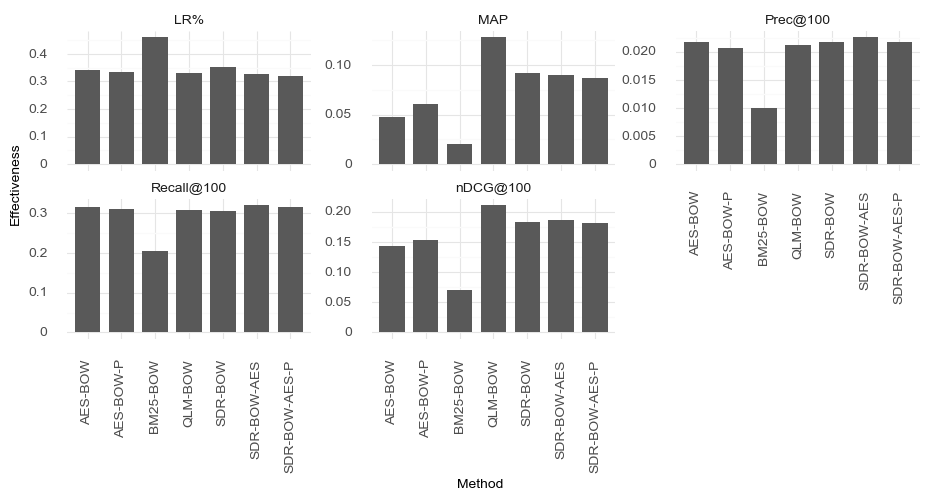

<ggplot: (8778032447275)>

In [10]:
p = ggplot(t5_long, aes(x='Method', y='Effectiveness')) \
+ theme_minimal() \
+ theme(axis_text_x=element_text(rotation=90), text=element_text(size=10))\
+ theme(legend_position='top', legend_box_margin=0, legend_title=element_blank())\
+ scale_fill_discrete(guide=False) \
+ theme(figure_size=(11,4), subplots_adjust={'wspace': 0.25}) \
+ geom_col(width = .75)\
+ facet_wrap('Measure', scales="free_y")
p

In [28]:
p.save('table4.pdf')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 11 x 4 in image.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: table4.pdf


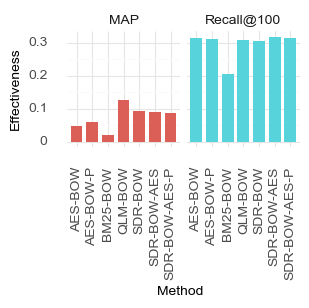

<ggplot: (8778018743875)>

In [30]:
p = ggplot(t5_long.query('Measure == "MAP" | Measure =="Recall@100"'), aes(x='Method', y='Effectiveness', fill='Measure')) \
+ theme_minimal() \
+ theme(axis_text_x=element_text(rotation=90), text=element_text(size=10))\
+ theme(legend_position='top', legend_box_margin=0, legend_title=element_blank())\
+ scale_fill_discrete(guide=False) \
+ theme(figure_size=(3,1.5)) \
+ geom_col(width = .75)\
+ facet_wrap('Measure')
p

In [28]:
p.save('table_5-map-recall.pdf')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 3 x 1.5 in image.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: table_5-map-recall.pdf
